## Spring 2021 CS 4641\7641 A: Machine Learning Homework 4

## Instructor: Dr. Mahdi Roozbahani

## Deadline: April 22, Thursday, AOE

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged on Piazza as part of the Q/A. However, all assignments should be done individually.

## Instructions for the assignment

- In this assignment, we have programming and theory questions.
- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
- You could directly type the Latex equations in the markdown cell.
- Typing with LaTeX is required for all the written questions, and can be done in markdown cell types. Handwritten answers will not be accepted. 
- If a question requires a picture, you could use this syntax $"<img src="" style="width: 300px;"/>"$ to include them within your ipython notebook.
- Questions marked with **[P]** are programming only and should be submitted to the autograder. Questions marked with **[W]** may require that you code, but should NOT be submitted to the autograder. It should be submitted on the written portion of the assignment on gradescope
- The outline of the assignment is as follows: 
    * Q1 [55+(10 bonus for undergrads)] > Neural Network <span style="color:blue">**[P]**</span>|<span style="color:green">**[W]** </span>
    * Q2 [15 pts(bonus for all)] > Image Classification based on Convolutional Neural Network </span>| <span style="color:green">**[W]** </span>
    * Q3 [40 pts] > Random Forest <span style="color:blue">**[P]** 3.1, 3.2 </span> | <span style="color:green">**[W]**</span> 3.3
    * Q4 [30 pts] > SVM <span style="color:blue">**[P]**</span>|<span style="color:green">**[W]** </span>
    
    
 
    

## Using the autograder


Undergrad students will find four assignments on Gradescope that correspond to HW4: "Assignment 4 - Programming", "Assignment 4 - Programming (Bonus)", "Assignment 4 - Nonprogramming (Bonus for all)", and "Assignment 4 - Nonprogramming".
Graduate students will find three assignments on Gradescope that correspond to HW4: "Assignment 4 - Programming", "Assignment 4 - Nonprogramming (Bonus for all)", and "Assignment 4 - Nonprogramming".
You will submit your code for the autograder on "Assignment 4 - Programming" in the following format:

* nn.py 
* randomforest.py
* feature.py

All you will have to do is implement the classes "dlnet", "RandomForest" and function "create_nl_feature" in the respective files. We have provided you different .py files and added libraries in those files. Please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework.

You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue.

For the "Assignment 4 - Nonprogramming" part, you will download your jupyter notebook as HTML, print it as a PDF from your browser and submit it on Gradescope. To download the notebook as html, click on "File" on the top left corner of this page and select "Download as > HTML". The non-programming part corresponds to Q1. For questions that include images include both your response and the generated images in your submission


## Environment Setup

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston 
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn import svm

## 1. Two Layer Neural Network [65pts] <span style="color:blue">**[P]**</span><span style="color:blue">**[W]**</span>

### Perceptron

![Perceptron](https://drive.google.com/uc?id=18BGNhZneIPYRvZRwr6vL5O3iCn5jOxwr)

<br><br>

A single layer perceptron can be thought of as a linear hyperplane as in logistic regression followed by a non-linear activation function. $$u_{i} = \sum \limits_{j=1}^{d} \theta_{ij}x_{j}+b_{i}$$  $$o_{i} = \phi \left( \sum \limits_{j=1}^{d} \theta_{ij}x_{j}+b_{i} \right) = \phi(\theta_{i}^{T}x+b_{i})$$ where $x$ is a d-dimensional vector i.e. $x \in R^{d}$. It is one datapoint with $d$ features. $\theta_{i} \in R^{d}$ is the weight vector for the $i^{th}$ hidden unit, $b_{i} \in R$ is the bias element for the $i^{th}$ hidden unit and $\phi(.)$ is a non-linear activation function that has been described below. $u_{i}$ is a linear combination of the features in $x_j$ weighted by $\theta_{i}$ whereas $o_{i}$ is the $i^{th}$ output unit from the activation layer. 


## Fully connected Layer
Typically, a modern neural network contains millions of perceptrons as the one shown in the previous image. Perceptrons interact in different configurations such as cascaded or parallel. In this part, we describe a fully connected layer configuration in a neural network which comprises multiple parallel perceptrons forming one layer. 

We extend the previous notation to describe a fully connected layer. Each layer in a fully connected network has a number of input/hidden/output units cascaded in parallel. Let us a define a single layer of the neural net as follows: <br>
$m$ demotes the number of hidden units in a single layer $l$ whereas $n$ denotes the number of units in the previous layer $l-1$.
$$u^{[l]}=\theta^{[l]}o^{[l-1]}+b^{[l]}$$ where $u^{[l]} \in R^{m}$ is a m-dimensional vector pertaining to the hidden units of the $l^{th}$ layer of the neural network after applying linear operations. Similarly, $o^{[l-1]}$ is the n-dimensional output vector corresponding to the hidden units of the $(l-1)^{th}$ activation layer. $\theta^{[l]} \in R^{m \times n}$ is the weight matrix of the $l^{th}$ layer where each row of $\theta^{[l]}$ is analogous to $\theta_{i}$ described in the previous section i.e. each row corresponds to one hidden unit of the $l^{th}$ layer. $b^{[l]} \in R^{m}$ is the bias vector of the layer where each element of b pertains to one hidden unit of the $l^{th}$ layer. This is followed by element wise non-linear activation function $o^{[l]} = \phi(u^{[l]})$.
The whole operation can be summarized as,
$$o^{[l]} = \phi(\theta^{[l]}o^{[l-1]}+b^{[l]}) $$
where $o^{[l-1]}$ is the output of the previous layer. 





## Activation Function 
There are many activation functions in the literature but for this question we are going to use Relu and Tanh only. 
### Relu
The rectified linear unit (Relu) is one of the most commonly used activation functions in deep learning models. The mathematical form is $$o = \phi(u) = max(0,u)$$<br> The derivative of relu function is given as $o' = \phi'(u) = \begin{cases}
&0& u \leq 0 \\
&1& u > 0
\end{cases} $  


![Relu](https://drive.google.com/uc?id=1qFNOnhB3B0wgt56bMsc-WI6cX0UWJAQX)


### Tanh
Tanh also known as hyperbolic tangent is like a shifted version of sigmoid activation function with its range going from -1 to 1. Tanh almost always proves to be better than the sigmoid function since the mean of the activations are closer to zero. Tanh has an effect of centering data that makes learning for the next layer a bit easier. The mathematical form of tanh is given as $$o = \phi(u) = tanh(u) = \frac{e^{u} - e^{-u}}{e^{u} + e^{-u}}$$ The derivative of tanh is given as $$o' = \phi'(u) = 1 - {\left(\frac{e^{u} - e^{-u}}{e^{u} + e^{-u}}\right)}^{2} = 1 - o^{2}$$

![Tanh](https://drive.google.com/uc?id=1FD83cZIsI1gY6g0dDKyaaHFrCnThl9za)

### Sigmoid
The sigmoid function is another non-linear function with S-shaped curve. This function is useful in the case of binary classification as its output is between 0 and 1. The mathematical form of the function is $$o = \phi(u)=\frac{1}{1+e^{-u}}$$<br> The derivation of the sigmoid function has a nice form and is given as $$o' = \phi'(u) = \frac{1}{1+e^{-u}} \left(1-\frac{1}{1+e^{-u}}\right) = \phi(u)(1-\phi(u))$$
<br><br>

<b>Note:</b> We will not be using sigmoid activation function for this assignment. This is included only for the sake of completeness. 

![Sigmoid](https://drive.google.com/uc?id=19UPS1IfcVNqH_PMAPg6ymAAVqGo9zHle)




## Mean Squared Error 

It is an estimator that measures the average of the squares of the errors i.e. the average squared difference between the actual and the estimated values. It estimates the quality of the learnt hypothesis between the actual and the predicted values. It's non-negative and closer to zero, the better the learnt function is.

### Implementation details
For regression problems as in this exercise, we compute the loss as follows:

$$MSE = \frac{1}{2N}\sum\limits_{i=1}^{N}\left(y_{i} -  \hat{y_{i}}\right)^{2}$$
where $y_{i}$ is the true label and $\hat{y_{i}}$ is the estimated label. We use a factor of $\frac{1}{2N}$ instead of $\frac{1}{N}$ to simply the derivative of loss function. 


## Forward Propagation
We start by initializing the weights of the fully connected layer using Xavier initialization [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf). During training, we pass all the data points through the network layer by layer using forward propagation. The main equations for forward prop have been described below. 
\begin{eqnarray}
u^{[0]} &=& x\\
u^{[1]}&=& \theta^{[1]}u^{[0]}+b^{[1]} \\
o^{[1]}&=& Tanh(u^{[1]}) \\
u^{[2]}&=& \theta^{[2]}o^{[1]}+b^{[2]} \\
\hat{y}=o^{[2]}&=& Relu(u^{[2]}) \\
\end{eqnarray}


Then we get the output and compute the loss 
$$l = \frac{1}{2N}\sum\limits_{i=1}^{N}\left(y_{i} -  \hat{y_{i}}\right)^{2}$$


## Backward propagation
After the forward pass, we do back propagation to update the weights and biases in the direction of the negative gradient of the loss function. So, we update the weights and biases using the following formulas
\begin{equation}
\theta^{[2]} := \theta^{[2]} - lr \times \frac{\partial l}{\partial \theta^{[2]}} \\
b^{[2]} := b^{[2]} - lr \times \frac{\partial l}{\partial b^{[2]}} \\
\theta^{[1]} := \theta^{[1]} - lr \times \frac{\partial l}{\partial \theta^{[1]}} \\
b^{[1]} := b^{[1]} - lr \times \frac{\partial l}{\partial b^{[1]}}
\end{equation}
where $lr$ is the learning rate. It decides the step size we want to take in the direction of the negative gradient. 



To compute the terms $\frac{\partial l}{\partial \theta^{[i]}}$ and $ \frac{\partial l}{\partial b^{[i]}}$ we use chain rule for differentiation as follows:

\begin{eqnarray}
\frac{\partial l}{\partial \theta^{[2]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial \theta^{[2]}} \\
\frac{\partial l}{\partial b^{[2]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial b^{[2]}}
\end{eqnarray}

So, $\frac{\partial l}{\partial o^{[2]}}$ is the differentiation of the loss function at point $o^{[2]}$ <br><br> $\frac{\partial o^{[2]}}{\partial u^{[2]}}$ is the differentiation of the Relu function at point $u^{[2]}$ <br><br> $\frac{\partial u^{[2]}}{\partial \theta^{[2]}}$ is equal to $o^{[1]}$ <br><br> $\frac{\partial u^{[2]}}{\partial b^{[2]}}$ is equal to $1$. <br><br>

To compute $\frac{\partial l}{\partial \theta^{[2]}}$, we need $o^{[2]}, u^{[2]} \& o^{[1]}$ which are calculated during forward propagation. So we need to store these values in cache variables during forward propagation to be able to access them during backward propagation. Similarly for calculating other partial derivatives, we store the values we'll be needing for chain rule in cache. These values are obtained from the forward propagation and used in backward propagation. The cache is implemented as a dictionary here where the keys are the variable names and the values are the variables values.  <br><br>Also, the functional form of the MSE differentiation and Relu differentiation are given by <br><br>
\begin{eqnarray}
\frac{\partial l}{\partial o^{[2]}} &=& \left(o^{[2]} - y\right) \\
\frac{\partial l}{\partial u^{[2]}} &=&  \frac{\partial l}{\partial o^{[2]}} * 1(u^{[2]} > 0)\\
\frac{\partial u^{[2]}}{\partial \theta^{[2]}} &=& o^{[1]} \\
\frac{\partial u^{[2]}}{\partial b^{[2]}} &=& 1
\end{eqnarray}

On vectorization, the above equations become:
\begin{eqnarray}
\frac{\partial l}{\partial o^{[2]}} &=& \frac{1}{n}\left(o^{[2]} - y\right) \\
\frac{\partial l}{\partial \theta^{[2]}} &=&  \frac{1}{n}\frac{\partial l}{\partial u^{[2]}}o^{[1]} \\
\frac{\partial l}{\partial b^{[2]}} &=& \frac{1}{n}\sum\frac{\partial l}{\partial u^{[2]}}
\end{eqnarray}


This completes the differentiation of loss function w.r.t to parameters in the second layer. We now move on to the first layer, the equations for which are given as follows: <br><br> 
\begin{eqnarray}
\frac{\partial l}{\partial \theta^{[1]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial o^{[1]}} \frac{\partial o^{[1]}}{\partial u^{[1]}} \frac{\partial u^{[1]}}{\partial \theta^{[1]}}  \\
\frac{\partial l}{\partial b^{[1]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial o^{[1]}} \frac{\partial o^{[1]}}{\partial u^{[1]}} \frac{\partial u^{[1]}}{\partial b^{[1]}}
\end{eqnarray}

Where 
\begin{eqnarray}
\frac{\partial u^{[2]}}{\partial o^{[1]}} &=& \theta^{[2]} \\
\frac{\partial o^{[1]}}{\partial u^{[1]}} &=& 1 - (o^{[1]}) ^ {2}\\
\frac{\partial u^{[1]}}{\partial \theta^{[1]}} &=& x\\
\frac{\partial u^{[1]}}{\partial b^{[1]}} &=& 1
\end{eqnarray}

Note that $\frac{\partial o^{[1]}}{\partial u^{[1]}}$ is the differentiation of the Tanh function at $u^{[1]}$.

The above equations outline the forward and backward propagation process for a 2-layer fully connected neural net with Tanh as the first activation layer and Relu has the second one. The same process can be extended to different neural networks with different activation layers. 



## Code Implementation: 

$$ \begin{eqnarray} dLoss\_o2 &=& \frac{\partial l}{\partial o^{[2]}} \implies dim=(1,379) \\ dLoss\_u2 &=& dLoss\_o2 \frac{\partial o^{[2]}}{\partial u^{[2]}} \implies dim=(1,379) \\ dLoss\_theta2 &=& dLoss\_u2 \frac{\partial u^{[2]}}{\partial \theta^{[2]}} \implies dim=(1,20) \\ dLoss\_b2 &=& dLoss\_u2 \frac{\partial u^{[2]}}{\partial b^{[2]}} \implies dim=(1,1) \\ dLoss\_o1 &=& dLoss\_u2 \frac{\partial u^{[2]}}{\partial o^{[1]}} \implies dim=(20,379) \\ dLoss\_u1 &=& dLoss\_o1 \frac{\partial o^{[1]}}{\partial u^{[1]}} \implies dim=(20,379) \\ dLoss\_theta1 &=& dLoss\_u1 \frac{\partial u^{[1]}}{\partial \theta^{[1]}} \implies dim=(20,13) \\ dLoss\_b1 &=& dLoss\_u1 \frac{\partial u^{[1]}}{\partial b^{[1]}} \implies dim=(20,1) \end{eqnarray} $$ 


<b>Note: </b>Training set has 379 examples.















### Question 

In this question, you will implement a two layer fully connected neural network. You will also experiment with different activation functions and optimization techniques. Functions with comments "TODO: implement this" are for you to implement. We provide two activation functions here - Relu and Tanh. You will implement a neural network that would have tanh activation followed by relu layer. 


You'll also implement Gradient Descent (GD) and Batch Gradient Descent (BGD) algorithms for training these neural nets. GD is mandatory for all. BGD is bonus for undergraduate students but mandatory for graduate students. 

We'll train this neural net on boston house-prices dataset. Graduate students have to use both GD and BGD to optimize their neural net. Undergraduate students have to implement GD while BGD is bonus for them.  Note: it is possible you'll run into nan or negative values for loss. This happens because of the small dataset we're using and some numerical stability issues that arise due to division by zero, natural log of zeros etc. You can experiment with the total number of iterations to mitigate this. 

You're free to tune hyperparameters like the batch size, number of hidden units in each layer etc. if that helps you in achieving the desired MSE values to pass the autograder tests. However, you're advised to try out the default values first. 

<b>Deliverables for this question: </b>
1. Loss plot and MSE value for neural net with gradient descent 
2. Loss plot and MSE value for neural net with batch gradient descent (mandatory for graduate students, bonus for undergraduate students)


Loss after iteration 0: 0.08998720790406559
Loss after iteration 2000: 0.034467264488451645
Loss after iteration 4000: 0.026077960446668706
Loss after iteration 6000: 0.021982332349226006
Loss after iteration 8000: 0.01921992016449608
Loss after iteration 10000: 0.017130251434287373
Loss after iteration 12000: 0.015480516747502974
Loss after iteration 14000: 0.014149250050912228
Loss after iteration 16000: 0.013054957287187694
Loss after iteration 18000: 0.012142871756187527
Loss after iteration 20000: 0.011374593594542693
Loss after iteration 22000: 0.010722201823918358
Loss after iteration 24000: 0.010164738815144212
Loss after iteration 26000: 0.009686031138667603
Loss after iteration 28000: 0.009273296451952781
Loss after iteration 30000: 0.00891622849145245
Loss after iteration 32000: 0.008603386834206651
Loss after iteration 34000: 0.008326543606107479
Loss after iteration 36000: 0.008084516911499636
Loss after iteration 38000: 0.007872812326037435
Loss after iteration 40000: 0.0

Text(0, 0.5, 'Loss')

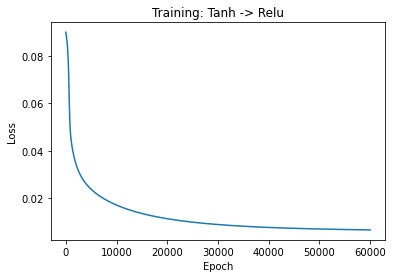

In [2]:
'''
Training the Neural Network with Gradient Descent, you do not need to modify this cell. 
'''
%load_ext autoreload
%autoreload 2

from NN import dlnet

# load dataset
dataset = load_boston() # load the dataset
x, y = dataset.data, dataset.target
y = y.reshape(-1,1)

x = MinMaxScaler().fit_transform(x) #normalize data
y = MinMaxScaler().fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1) #split data
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.reshape(1,-1), y_test #condition data

nn = dlnet(x_train,y_train,lr=0.001) # initalize neural net class
nn.gradient_descent(x_train, y_train, iter = 60000) #train

# create figure
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f'Training: {nn.neural_net_type}')
plt.xlabel("Epoch")
plt.ylabel("Loss")


In [3]:
'''
Testing Neural Network with Gradient Descent, you do not need to modify this cell. 
'''
y_predicted = nn.predict(x_test) # predict
y_test = y_test.reshape(1,-1)
print("Mean Squared Error (MSE)", (np.sum((y_predicted-y_test)**2)/y_test.shape[1]))
 


Mean Squared Error (MSE) 0.013986532649307068


Loss after iteration 2000: 0.1306276699005193
Loss after iteration 4000: 0.008030351196084197
Loss after iteration 6000: 0.003282886056267799
Loss after iteration 8000: 0.001525622712820839
Loss after iteration 10000: 0.0002858212249117244
Loss after iteration 12000: 0.002508832578324511
Loss after iteration 14000: 0.002110901494759234
Loss after iteration 16000: 0.0014264284740879006
Loss after iteration 18000: 0.021058273581532554
Loss after iteration 20000: 0.000889629716445448
Loss after iteration 22000: 0.0025269184821049826
Loss after iteration 24000: 2.5417467797420152e-05
Loss after iteration 26000: 0.0001679180486395162
Loss after iteration 28000: 0.015615589487595062
Loss after iteration 30000: 0.0028429822552402443
Loss after iteration 32000: 0.0044760082976171775
Loss after iteration 34000: 0.043837462097629995
Loss after iteration 36000: 0.005407604755896429
Loss after iteration 38000: 0.01256341543671532
Loss after iteration 40000: 0.0023061550418177644
Loss after iterati

Text(0, 0.5, 'Loss')

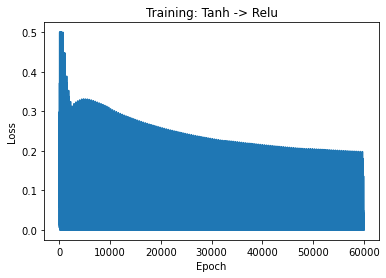

In [4]:
'''
Training the Neural Network with Batch Gradient Descent, you do not need to modify this cell. 
'''
from NN import dlnet

# load dataset
dataset = load_boston() # load the dataset
x, y = dataset.data, dataset.target
y = y.reshape(-1,1)

x = MinMaxScaler().fit_transform(x) #normalize data
y = MinMaxScaler().fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1) #split data
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.reshape(1,-1), y_test #condition data

nn = dlnet(x_train,y_train,lr=0.001) # initalize neural net class
nn.batch_gradient_descent(x_train, y_train, iter = 60000) #train

# create figure
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f'Training: {nn.neural_net_type}')
plt.xlabel("Epoch")
plt.ylabel("Loss")


In [5]:
'''
Testing Neural Network with Batch Gradient Descent, you do not need to modify this cell. 
'''
y_predicted = nn.predict(x_test) # predict 
y_test = y_test.reshape(1,-1)
print("Mean Squared Error (MSE)", (np.sum((y_predicted-y_test)**2)/y_test.shape[1]))
 


Mean Squared Error (MSE) 0.013921827112066217


## 2:  (Bonus for all) Image Classification based on Convolutional Neural Networks [15pts] <span style="color:green">**[W]**</span>


### Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research. In this part, you will build a convolutional neural network based on Keras to solve the image classification task for CIFAR10. If you haven't installed TensorFlow, you can install the package by **pip** command or train your model by uploading HW4 notebook to [Colab](https://colab.research.google.com/) directly. Colab contains all packages you need for this section.  

Hint1: [First contact with Keras](https://keras.io/about/)

Hint2: [How to Install Keras](https://www.pyimagesearch.com/2016/07/18/installing-keras-for-deep-learning/)

Hint3：[CS231n Tutorial (Layers used to build ConvNets) ](https://cs231n.github.io/convolutional-networks/)

### Environment Setup

In [6]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.layers import LeakyReLU
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

### Load CIFAR10 dataset

We use CIFAR10 dataset to train our model. This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. Each example is $32\times 32$ pixel color image of various objects. 

In [7]:
# Helper function, You don't need to modify it
# split data between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions
img_rows, img_cols = 32, 32
number_channels = 3
#set num of classes
num_classes = 10

if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], number_channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], number_channels, img_rows, img_cols)
    input_shape = (number_channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, number_channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, number_channels)
    input_shape = (img_rows, img_cols, number_channels)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 5s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


### Load some images from CIFAR10

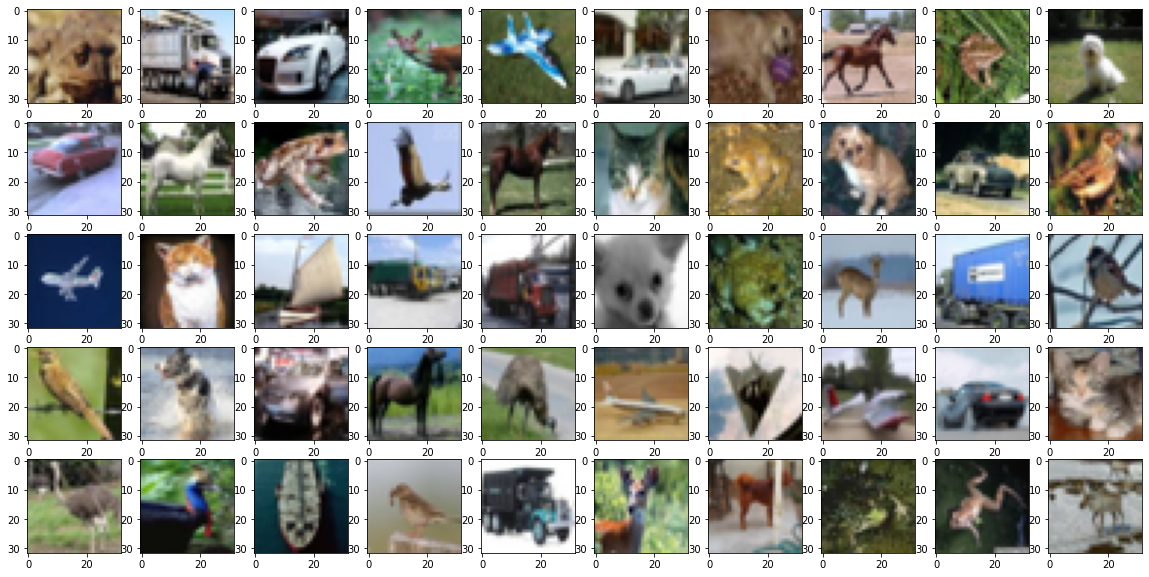

In [8]:
# Helper function, You don't need to modify it
# Show some images from CIFAR10

fig = plt.figure(figsize=(20, 10))
for i in range(50):
    random_index = np.random.randint(0, len(y_train))
    ax = fig.add_subplot(5, 10, i+1)
    ax.imshow(x_train[random_index, :])
plt.show()

As you can see from above, the CIFAR10 dataset contains  selection of objects. The images have been size-normalized and objects remain centered in fixed-size images.

### Build convolutional neural network model

In this part, you need to build a convolutional neural network as described below. The architecture of the model is:

 **[INPUT - CONV - CONV - MAXPOOL - DROPOUT - CONV - CONV - MAXPOOL - DROPOUT - FC1 - DROPOUT - FC2]**

> INPUT: [$32\times32\times3$] will hold the raw pixel values of the image, in this case, an image of width 32, height 32, and with 3 color channels. This layer should give 16 filters and have appropriate padding to maintain shape.

> CONV: Conv. layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to the input volume. We decide to set the kernel_size $3\times3$ for the both Conv. layers. For example, the output of the Conv. layer may look like $[32\times32\times32]$ if we use 32 filters. Again, we use padding to maintain shape.

> MAXPOOL: MAXPOOL layer will perform a downsampling operation along the spatial dimensions (width, height). With pool size of $2\times2$, resulting shape takes form $16\times16$.

> DROPOUT: DROPOUT layer with the dropout rate of 0.25, to prevent overfitting.

> CONV: Additonal Conv. layer take outputs from above layers and applies more filters. The Conv. layer may look like $[16\times16\times32]$. We set the kernel_size $3\times3$ and use padding to maintain shape for both Conv. layers.

> CONV: Additonal Conv. layer take outputs from above layers and applies more filters. The Conv. layer may look like $[16\times16\times64]$.

> MAXPOOL: MAXPOOL layer will perform a downsampling operation along the spatial dimensions (width, height).

> DROPOUT: Dropout layer with the dropout rate of 0.25, to prevent overfitting.

> FC1: Dense layer which takes input above layers, and has 256 neurons. Flatten operations may be useful.

> DROPOUT: Dropout layer with the dropout rate of 0.5, to prevent overfitting.

> FC2: Dense layer with 10 neurons, and softmax activation, is the final layer. The dimension of the output space is the number of classes.

**Activation function**: Use LeakyReLU unless otherwise indicated to build you model architecture.

Note that while this is a suggested model design, you may use other architectures and experiment with different layers for better results.


In [9]:
# Helper function, You don't need to modify it
# Show the architecture of the model
achi=plt.imread('images/Architecture.png')
fig = plt.figure(figsize=(10,10))
plt.imshow(achi)

FileNotFoundError: [Errno 2] No such file or directory: 'images/Architecture.png'

#### Defining Variables ####

You now need to set training variebles in the __init__() function in cnn.py. Once you have defined variables you may use the cell below to see them.

In [ ]:
# Helper function, You don't need to modify it
# You can adjust parameters to train your model in __init__() in cnn.py

from template_files.cnn import CNN

net = CNN()
batch_size, epochs, init_lr = net.get_vars()
print(f'Batch Size\t: {batch_size} \nEpochs\t\t: {epochs} \nLearning Rate\t: {init_lr} \n')


#### Defining model ####

You now need to complete the create_net() function in cnn.py to define your model structure. Once you have defined a model structure you may use the cell below to examine your architecture.

In [ ]:
# Helper function, You don't need to modify it
# model.summary() gives you details of your architecture.
#You can compare your architecture with the 'Architecture.png'

from template_files.cnn import CNN
net = CNN()

s = tf.keras.backend.clear_session()
model=net.create_net()
model.summary()

#### Compiling model ####

Next prepare the model for training by completing compile_model() in cnn.py
Remember we are performing 10-way clasification when selecting a loss function.

In [ ]:
# Helper function, You don't need to modify it
# Complete compile_model() in cnn.py.
from template_files.cnn import CNN

net = CNN()
model = net.compile_net(model)
print(model)

### Train the network

**Tuning:** Training the network is the next thing to try.  You can set your parameter at the **Defining Variable** section. If your parameters are set properly, you should see the loss of the validation set decreased and the value of accuracy increased. It may take more than 30 minutes to train your model. 

**Expected Result:** You should be able to achieve more than $80\%$ accuracy on the test set to get full 15 points. If you achieve accuracy between $75\%$ to $79\%$, you will only get half points of this part. 

#### Train your own CNN model####

In [ ]:
# Helper function, You don't need to modify it
# Train the model

from template_files.cnn import CNN

net = CNN()
batch_size, epochs, init_lr = net.get_vars()

def lr_scheduler(epoch):
    new_lr = init_lr * 0.9 ** epoch
    print("Learning rate:", new_lr)
    return new_lr

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)],
    shuffle=True,
    verbose=1,
    initial_epoch=0, 
    validation_data=(x_test, y_test)
)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Helper function, You don't need to modify it
# list all data in history
print(history.history.keys())

# summarize history for accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# make predictions
y_pred = model.predict_proba(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_prob = np.max(y_pred, axis=1)
y_gt_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(8, 7))
plt.imshow(confusion_matrix(y_gt_classes, y_pred_classes))
plt.title('Confusion matrix', fontsize=16)
plt.xticks(np.arange(10), cifar10_classes, rotation=90, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

## 3: Random Forests [40pts] <span style="color:blue">**[P]**</span> <span style="color:green">**[W]**</span>

**NOTE**: Please use sklearn's DecisionTreeClassifier in your Random Forest implementation.
[You can find more details about this classifier here.](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier_)

### 3.1 Random Forest Implementation (30 pts) <span style="color:blue">**[P]**</span>

The decision boundaries drawn by decision trees are very sharp, and fitting a decision tree of unbounded depth to a list of examples almost inevitably leads to **overfitting**. In an attempt to decrease the variance of a decision tree, we're going to use a technique called 'Bootstrap Aggregating' (often abbreviated 'bagging'). This stems from the idea that a collection of weak learners can learn decision boundaries as well as a strong learner. This is commonly called a Random Forest.

We can build a Random Forest as a collection of decision trees, as follows:

1. For every tree in the random forest, we're going to 

    a) Subsample the examples with replacement. Note that in this question, the size of the subsample data is equal to the original dataset. 
    
    b) From the subsamples in a), choose attributes at random to learn on in accordance with a provided attribute subsampling rate. Based on what it was mentioned in the class, we randomly pick features in each split. We use a more general approach here to make the programming part easier. Let's randomly pick some features (70% percent of features) and grow the tree based on the pre-determined randomly selected features. Therefore, there is no need to find random features in each split.
    
    c) Fit a decision tree to the subsample of data we've chosen to a certain depth.
    
Classification for a random forest is then done by taking a majority vote of the classifications yielded by each tree in the forest after it classifies an example.

In RandomForest Class, 
1. X is assumed to be a matrix with num_training rows and num_features columns where num_training is the
number of total records and num_features is the number of features of each record. 

2. y is assumed to be a vector of labels of length num_training.

**NOTE:** Lookout for TODOs for the parts that needs to be implemented.

### 3.2 Hyperparameter Tuning with a Random Forest (5pts) <span style="color:blue">**[P]**</span>

In machine learning, hyperparameters are parameters that are set before the learning process begins. The max_depth, num_estimators, or max_features variables from 3.1 are examples of different hyperparameters for a random forest model. In this section, you will tune your random forest model on an e-commerce dataset to achieve a high accuracy on a classifying revenue sessions (whether a customer will purchase a product) from user behavior.

Let's first review the dataset in a bit more detail.

#### Dataset Objective

Imagine that we are doctors working on a cure for heart disease by using machine learning to categorize patients. We know that narrowing arteries are an early indicator of disease. We are tasked with the responsibility of coming up with a method for determining the likelihood of patient having narrowing arteries. We will then use this information to decide which patients to run further tests on for treatment.

After much deliberation amongst the team, you come to a conclusion that we can use past patient data to predict the future occurence of disease. 

We will use our random forest algorithm from Q3.1 to predict if a pateient may have indicators of heart disease.

You can find more information on the dataset [here](https://archive.ics.uci.edu/ml/datasets/heart+disease).

#### Loading the dataset


The dataset that the company has collected has the following features:

Only 14 used out of a potential 76
 
Inputs:

1. (age)       
2. (type)       
3. (cp) chest pain type
4. (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) serum cholestoral in mg/dl
6. (fbs) (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. (restecg) resting electrocardiographic results:
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach) maximum heart rate achieved
9. (exang) exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) ST depression induced by exercise relative to rest
11. (slope) the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. (ca) number of major vessels (0-3) colored by flourosopy      
13. (thal) 3 = normal; 6 = fixed defect; 7 = reversable defect

Output:

14. (num) target value:
    * 0 means <50% chance of narrowing arteries 
    * 1+ means greater than 50% chance of narrowing arteries
    
Your random forest model will try to predict this variable.

In [10]:
# Logic for loading in datasets. DO NOT MODIFY anything in this block.

#This is a Helper cell. DO NOT MODIFY CODE IN THIS CELL
from sklearn import preprocessing
import pandas as pd
preprocessor = preprocessing.LabelEncoder()

data_train = pd.read_csv("../data/heart_disease_cleaveland_train.csv")
data_test = pd.read_csv("../data/heart_disease_cleaveland_test.csv")

X_train = data_train.drop(columns = 'num')
y_train = data_train['num']
y_train = y_train.to_numpy()
y_train[y_train > 1] = 1
X_test = data_test.drop(columns = 'num')
X_test = np.array(X_test)
y_test = data_test['num']
y_test = y_test.to_numpy()
y_test[y_test > 1] = 1
#y_test = np.array()
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

In the following codeblock, train your random forest model with different values for max_depth, n_estimators, or max_features and evaluate each model on the held-out test set. Try to choose a combination of hyperparameters that maximizes your prediction accuracy on the test set (aim for 75%+). **Once you are satisfied with your chosen parameters, change the default values for max_depth, n_estimators, and max_features in the __init__ function of your RandomForest class in random_forest.py to your chosen values, and then submit this file to Gradescope. You must achieve at least a 75% accuracy against the test set in Gradescope to receive full credit for this section.**

In [25]:
"""
TODO: 
n_estimators defines how many decision trees are fitted for the random forest.
max_depth defines a stop condition when the tree reaches to a certain depth.
max_features controls the percentage of features that are used to fit each decision tree.

Tune these three parameters to achieve a better accuracy. While you can use the provided test set to 
evaluate your implementation, you will need to obtain 75% on the test test set to receive full credit 
for this section.
"""
from random_forest import RandomForest
import sklearn.ensemble
n_estimators = 12 #Hint: Consider values between 5-12.
max_depth = 5 # Hint: Consider values betweeen 3-12
max_features = 0.7 # Hint: Consider values betweeen 0.7-1.0.

random_forest = RandomForest(n_estimators, max_depth, max_features)

random_forest.fit(X_train, y_train)
    
accuracy=random_forest.OOB_score(X_test, y_test)
    
print("accuracy: %.4f" % accuracy)

accuracy: 0.7398


### 3.3 Plotting Feature Importance (5pts) <span style="color:green">**[W]**</span>

While building tree-based models, it's common to quantify how well splitting on a particular feature in a decision tree helps with predicting the target label in a dataset. Machine learning practicioners typically use "Gini importance", or the (normalized) total reduction in entropy brought by that feature to evaluate how important that feature is for predicting the target variable. 

Gini importance is typically calculated as the reduction in entropy from reaching a split in a decision tree weighted by the probability of reaching that split in the decision tree. Sklearn internally computes the probability for reaching a split by finding the total number of samples that reaches it during the training phase divided by the total number of samples in the dataset. This weighted value is our feature importance.

Let's think about what this metric means with an example. A high probabiity of reaching a split on "Age" in a decision tree trained on our patient dataset (many samples will reach this split for a decision) and a large reduction in entropy from splitting on "Age" will result in a high feature importance value for "Age". This could mean "Age" is a very important feature for predicting a patients probability of disease. On the other hand, a low probability of reaching a split on "Cholesterol (chol)" in a decision tree (few samples will reach this split for a decision) and a low reduction in entropy from splitting on "Cholesterol (chol)" will result in a low feature importance value. This could mean "Cholesterol (chol)" is not a very informative feature for predicting a patients probability of disease in our decision tree. **Thus, the higher the feature importance value, the more important the feature is to predicting the target label.**

Fortunately for us, fitting a sklearn.DecisionTreeClassifier to a dataset auomatically computes the Gini importance for every feature in the decision tree and stores these values in a **feature_importances_** variable. [Review the docs for more details on how to access this variable](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

In the function below, display a bar plot that shows the feature importance values for at least one decision tree in your tuned random forest from Q3.2, and briefly comment on whether any features have noticeably higher / or lower importance weights than others. [Note that there isn't a "correct" answer here. We simply want you to investigate how different features in your random forest contribute to predicting the target variable].


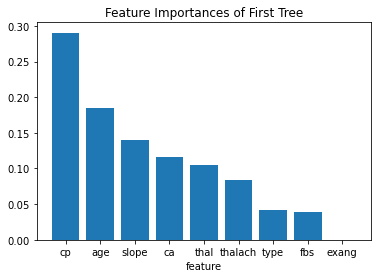

In [26]:
# Complete plot_feature_importance() in random_forest.py


random_forest.plot_feature_importance(data_train)

## 4: SVM (30 Pts) <span style="color:green">**[W]**</span> <span style="color:blue">**[P]**</span>


### 4.1 Fitting an SVM classifier by hand (20 Pts) <span style="color:green">**[W]**</span>

Consider a dataset with the following points in 2-dimensional space:

| $$x_1$$ | $$x_2$$ | $$y$$ |
| --- | --- | --- |
| 0 | 0 | -1 |
| 0 | 2 | -1 |
| 2 | 0 | -1 |
| 2 | 2 | 1 |
| 4 | 0 | 1 |
| 4 | 4 | 1 |

Here, $x_1$ and $x_2$ are features and $y$ is the label.

The max margin classifier has the formulation,

$$\min{||\mathbf{\theta}||^2} $$

$$s.t.\ y_i(\mathbf{x_i} \mathbf{\theta} + b) ≥ 1 \ \ \ \ \forall \ i$$

**Hint:** $\mathbf{x_i}$ are the suppport vectors. Margin is equal to $\frac{1}{||\mathbf{\theta}||}$ and full margin is equal to $\frac{2}{||\mathbf{\theta}||}$. You might find it useful to plot the points in a 2D plane.

(1) Are the points linearly separable? Does adding the point $\mathbf{x} = (4, 2)$, $y = -1$ change the separability? (2 pts)

The points given are linearly separable, but this changes when the point $\mathbf{x} = (4, 2)$, $y = -1$ is added, since the new point is within the region where points are classified as -1.

(2) According to the max-margin formulation, find the separating hyperplane. (4 pts)

By inspection, the hyperplane/line that maximizes the margins is $x_2 = -x_1 + 3$. 

(3) Find a vector parallel to the optimal vector $\mathbf{\theta}$. (4 pts)

A vector parallel to the optimal vector $\mathbf{\theta}$ is $(1, 1)$.

(4) Calculate the value of the margin achieved by this $\mathbf{\theta}$? (4 pts)

The margin is the distance between the decision boundary and the point closest to the decision boundary. It is $\sqrt{2}/2$.

(5) Solve for $\mathbf{\theta}$, given that the margin is equal to $1/||\mathbf{\theta}||$. (4 pts)

The magnitude of $\mathbf{\theta}$ is $\sqrt{2}$ and the direction is parallel to (1, 1). 
The unit vector representing the direction of the vector (1, 1) is $u = (\sqrt{2}/2, \sqrt{2}/2)$.

$\mathbf{\theta} = u||\mathbf{\theta}|| = (1, 1)$.

(6) If we remove one of the points from the original data the SVM solution might change. Find all such points which change the solution. (2 pts)

Removing (2, 2) or (2, 0) would change the solution.


### 4.2 Feature Mapping (10 Pts) <span style="color:blue">**[P]**</span>

Let's look at a dataset where the datapoint can't be classified with a good accuracy using a linear classifier. Run the below cell to generate the dataset.

We will also see what happens when we try to fit a linear classifier to the dataset.

In [27]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston 
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn import svm

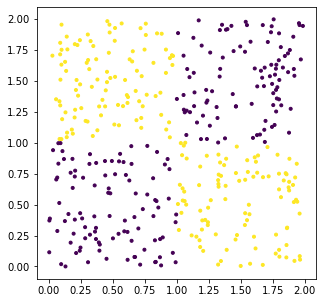

In [28]:
# DO NOT CHANGE
# Generate dataset

random_state = 1

X_1 = np.random.uniform(size=(100, 2))
y_1 = np.zeros((100,)) - 1

X_2 = np.random.uniform(size=(100, 2))
X_2[:, 0] = X_2[:, 0] + 1.0
y_2 = np.ones((100,))

X_3 = np.random.uniform(size=(100, 2))
X_3[:, 1] = X_3[:, 1] + 1.0
y_3 = np.ones((100,))

X_4 = np.random.uniform(size=(100, 2))
X_4[:, 0] = X_4[:, 0] + 1.0
X_4[:, 1] = X_4[:, 1] + 1.0
y_4 = np.zeros((100,)) - 1

X = np.concatenate([X_1, X_2, X_3, X_4], axis=0)
y = np.concatenate([y_1, y_2, y_3, y_4], axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=random_state)

f, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c = y, marker = '.') 
plt.show() 

In [29]:
# DO NOT CHANGE

def visualize_decision_boundary(X, y, feature_new=None, h=0.02):
    '''
    You don't have to modify this function
    
    Function to vizualize decision boundary
    
    feature_new is a function to get X with additional features
    '''
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx_1, xx_2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    if X.shape[1] == 2:
        Z = svm_cls.predict(np.c_[xx_1.ravel(), xx_2.ravel()])
    else:
        X_conc = np.c_[xx_1.ravel(), xx_2.ravel()]
        X_new = feature_new(X_conc)
        Z = svm_cls.predict(X_new)

    Z = Z.reshape(xx_1.shape)
    
    f, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
    plt.contourf(xx_1, xx_2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.xlim(xx_1.min(), xx_1.max())
    plt.ylim(xx_2.min(), xx_2.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

Accuracy on test dataset: 0.5625


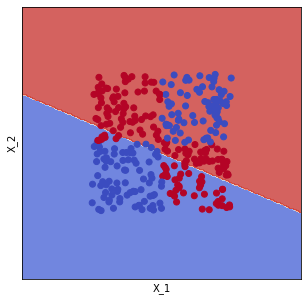

In [30]:
# DO NOT CHANGE
# Try to fit a linear classifier to the dataset

svm_cls = svm.LinearSVC()
svm_cls.fit(X_train, y_train)
y_test_predicted = svm_cls.predict(X_test)

print("Accuracy on test dataset: {}".format(accuracy_score(y_test, 
                                                           y_test_predicted)))

visualize_decision_boundary(X_train, y_train)

We can see that we need a non-linear boundary to be able to successfully classify data in this dataset. By mapping the current feature x to a higher space with more features, linear SVM could be performed on the features in the higher space to learn a non-linear decision boundary. In the function below add additional features which can help classify in the above dataset. After creating the additional features use code in the further cells to see how well the features perform on the test set. 

**Note:** You should get an accuracy above 95%

**Hint:** Think of the shape of the decision boundary that would best separate the above points. What additional features could help map the linear boundary to the non-linear one? Look at [this](https://xavierbourretsicotte.github.io/Kernel_feature_map.html) for a detailed analysis of doing the same for points separable with a circular boundary

In [31]:
# DO NOT CHANGE
from feature import create_nl_feature

X_new = create_nl_feature(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size=0.20, 
                                                    random_state=random_state)

[[8.77248777e-01 8.62149931e-03]
 [8.90103062e-01 2.34518412e-01]
 [2.83057871e-01 3.17216564e-01]
 [3.55244040e-01 4.04360757e-01]
 [3.90555890e-01 1.93861640e-01]
 [6.59322153e-02 2.86414359e-01]
 [9.37032145e-01 5.47807652e-01]
 [1.70018451e-01 1.92213736e-01]
 [4.40799790e-01 7.34917127e-01]
 [8.55596491e-01 4.75762074e-01]
 [2.67350349e-01 7.16377257e-01]
 [6.46550978e-01 2.07348924e-01]
 [5.89364685e-01 2.83625800e-01]
 [2.02691979e-01 3.78376571e-01]
 [3.68245424e-01 3.11723743e-01]
 [4.63931975e-01 5.94598895e-01]
 [6.14703399e-01 2.78836831e-01]
 [7.69256161e-01 5.80850552e-01]
 [2.59958808e-01 3.87813536e-01]
 [5.00662128e-01 2.26788513e-01]
 [7.69431383e-01 9.73178835e-01]
 [7.66532297e-03 3.86897073e-01]
 [9.58509730e-02 1.85923573e-02]
 [3.97938203e-01 1.76952711e-01]
 [3.57860071e-01 6.54103927e-01]
 [6.78796135e-01 5.89213960e-01]
 [9.95254812e-01 4.19325417e-01]
 [8.14831645e-01 7.12124642e-01]
 [6.73789358e-01 7.66597867e-02]
 [3.68009514e-01 2.21503161e-01]
 [9.067777

Accuracy on test dataset: 1.0
[[-0.99714487 -0.99975757]
 [-0.97714487 -0.99975757]
 [-0.95714487 -0.99975757]
 ...
 [ 2.94285513  2.98024243]
 [ 2.96285513  2.98024243]
 [ 2.98285513  2.98024243]]


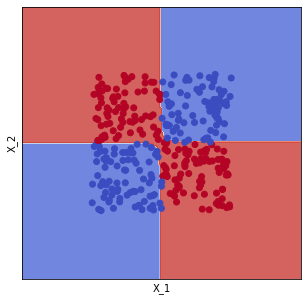

In [32]:
# DO NOT CHANGE
# Fit to the new features and vizualize the decision boundary
# You should get more than 90% accuracy on test set

svm_cls = svm.LinearSVC()
svm_cls.fit(X_train, y_train)
y_test_predicted = svm_cls.predict(X_test)

print("Accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))

visualize_decision_boundary(X_train, y_train, create_nl_feature)